In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, RocCurveDisplay
from sklearn import svm

warnings.filterwarnings("ignore")
plt.style.use("seaborn")

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
df = pd.concat([y, X], axis=1)
print(f"Data size: {df.shape}")
df

Data size: (178, 14)


,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [115]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malicacid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

### Масштабирование признаков

In [4]:
normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X)
X = pd.DataFrame(data=X_real_norm_np)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<AxesSubplot:xlabel='class', ylabel='count'>

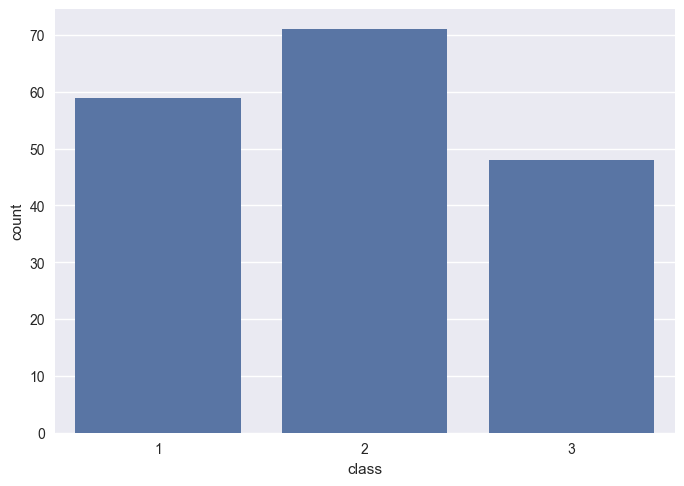

In [118]:
sns.countplot(x ='class', data = df)

<AxesSubplot:xlabel='class', ylabel='Total_phenols'>

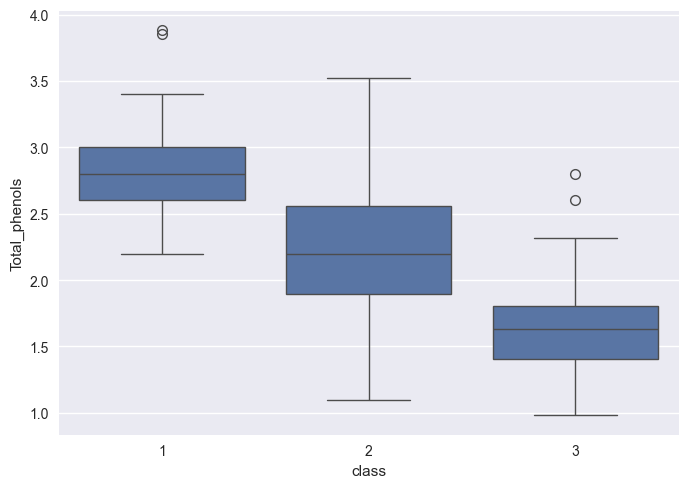

In [119]:
sns.boxplot(x='class', y='Total_phenols', data=df)

<AxesSubplot:title={'center':'Wine Correlation of Features'}>

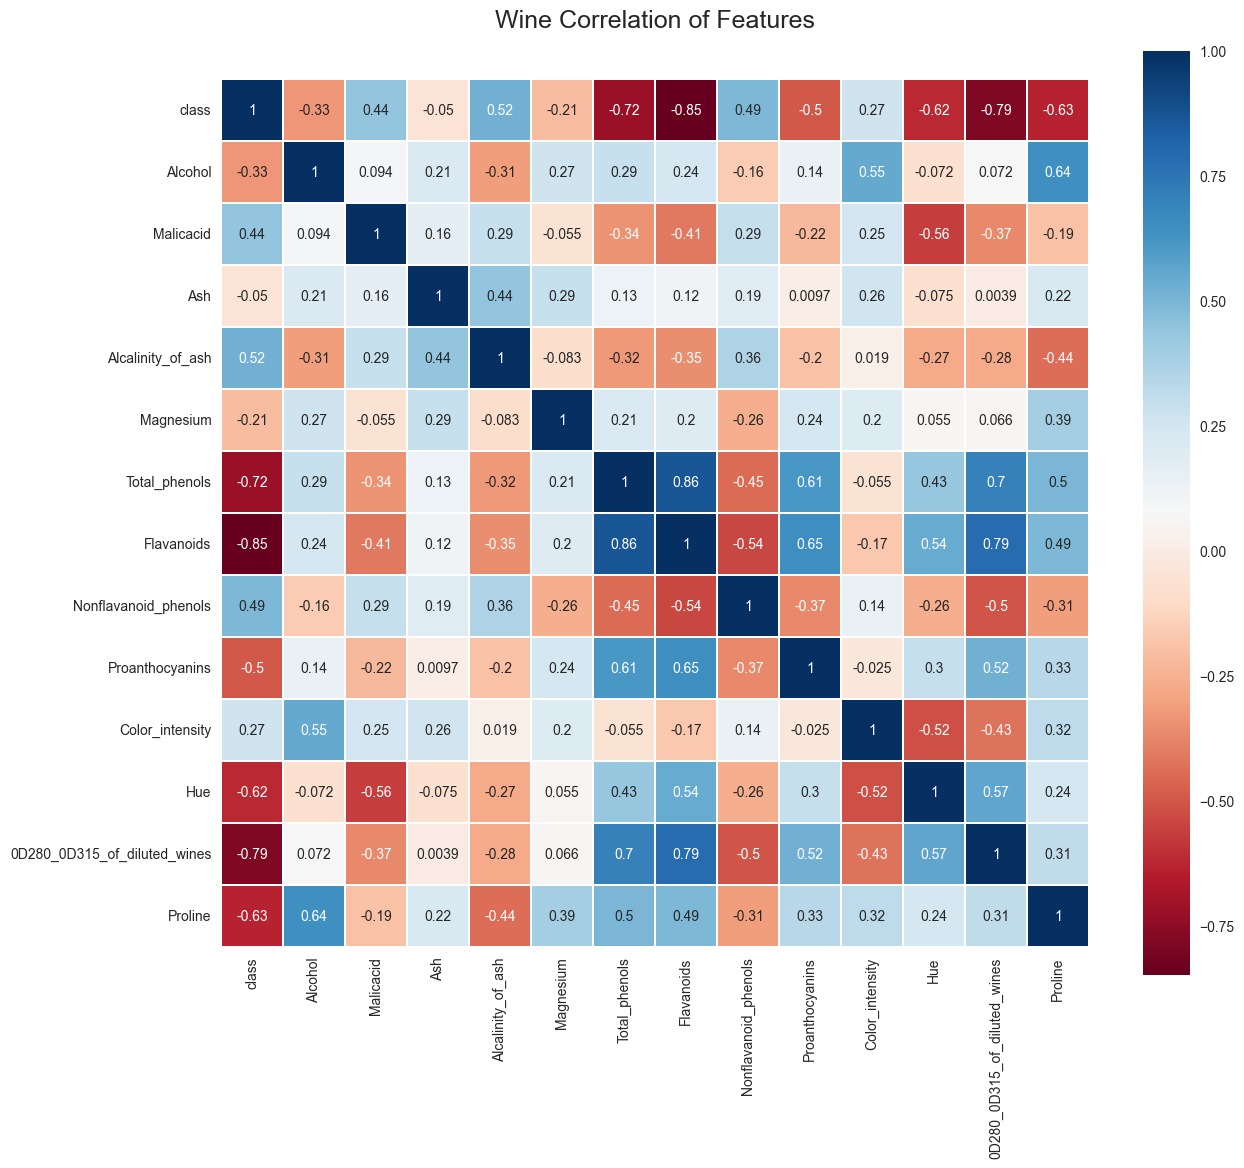

In [120]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))

plt.title("Wine Correlation of Features", y=1.05, size=18)
sns.heatmap(
    df.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
)

In [7]:
properties = ["class"]
for property in df:
    
    df[f"{property}Bin"] = pd.cut(df[f"{property}"].astype(int), 5)
    df[f"{property}Bin"].head()

    label = LabelEncoder()
    df[f"{property}Bin_Code"] = label.fit_transform(df[f"{property}Bin"])
    
    properties.append(f"{property}Bin_Code")
    

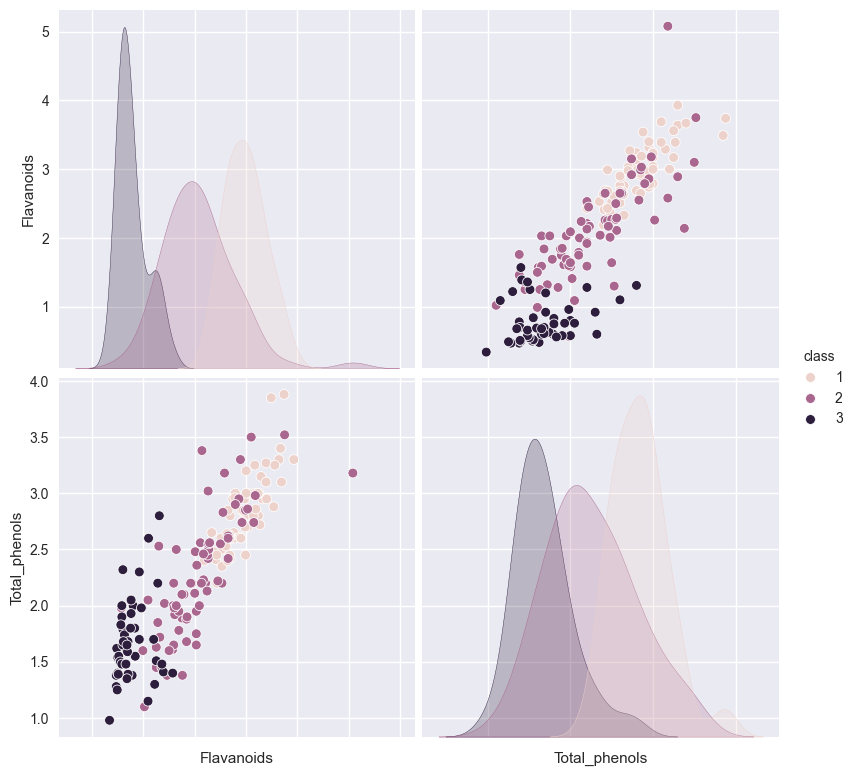

In [121]:
g = sns.pairplot(
    df[["class", "Flavanoids", "Total_phenols"]],
    hue="class",
    #palette="seismic",
    size=4,
    diag_kind="kde",
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50),
)
g.set(xticklabels=[])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

## Самые коррелирующие признаки

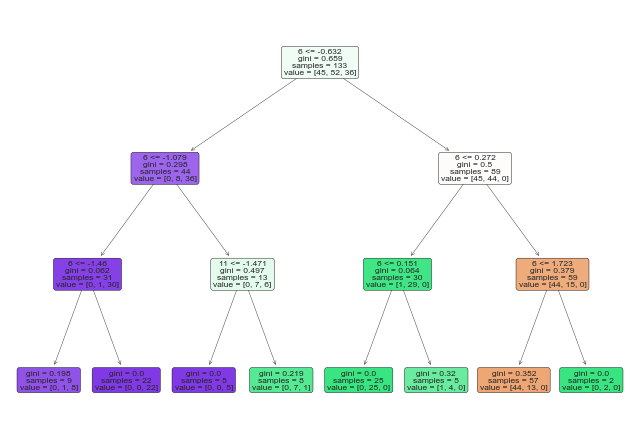

In [9]:
dt = DecisionTreeClassifier(max_depth=3, random_state=13, criterion='gini').fit(X_train[[6,11]], y_train) #Flavanoids, 0D280_0D315_of_diluted_wines

plot_tree(dt, feature_names=X[[6,11]].columns, filled=True, rounded=True)
plt.show()

In [8]:
pred_dt = pd.DataFrame(dt.predict(X_test[[6,11]]))

print("Accuracy: ", "%.2f" % (accuracy_score(y_test, pred_dt)*100))
print(classification_report(y_test, pred_dt))

Accuracy:  82.22
              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.79      0.79      0.79        19
           3       1.00      0.75      0.86        12

    accuracy                           0.82        45
   macro avg       0.85      0.82      0.83        45
weighted avg       0.84      0.82      0.82        45



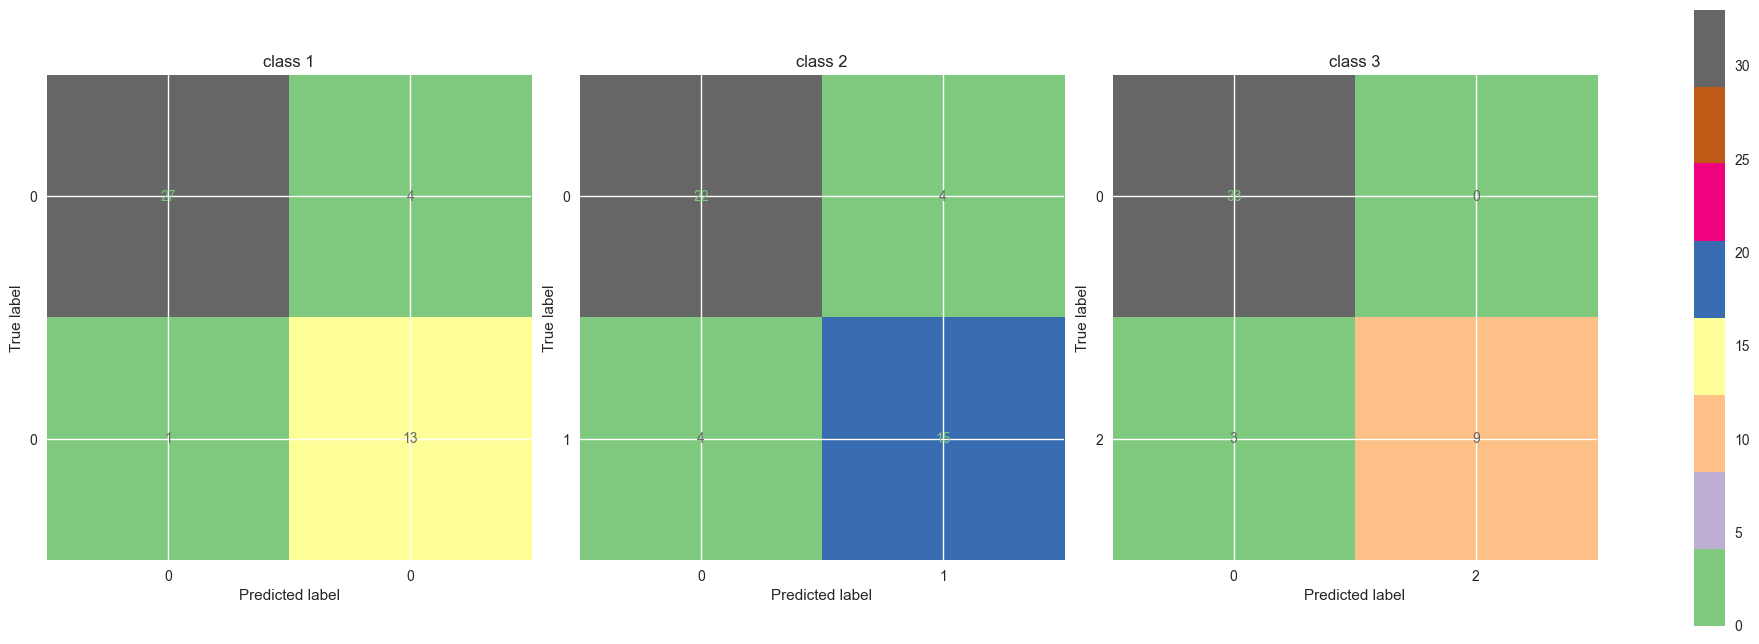

In [10]:
conf_mat = multilabel_confusion_matrix(y_true=y_test, y_pred=pred_dt)

f, axes = plt.subplots(1, 3, figsize=(25, 8))
axes = axes.ravel()
for i in range(3):
    disp = ConfusionMatrixDisplay(conf_mat[i], display_labels=[0, i])
    disp.plot(ax=axes[i], colorbar=None, cmap="Accent")
    disp.ax_.set_title(f'class {i+1}')

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

## Некоррелирующие признаки

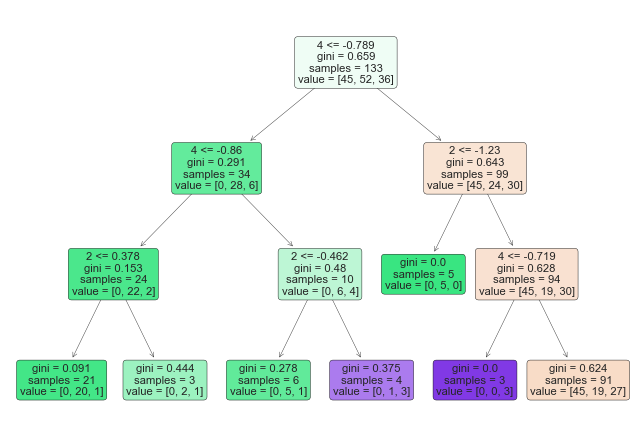

In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=13, criterion='gini').fit(X_train[[2,4]], y_train) #Ash, Magnesium

plot_tree(dt, feature_names=X[[2,4]].columns, filled=True, rounded=True)
plt.show()

In [12]:
pred_dt = pd.DataFrame(dt.predict(X_test[[2,4]]))

print("Accuracy: ", "%.2f" % (accuracy_score(y_test, pred_dt)*100))
print(classification_report(y_test, pred_dt))

Accuracy:  57.78
              precision    recall  f1-score   support

           1       0.48      0.93      0.63        14
           2       0.86      0.63      0.73        19
           3       0.25      0.08      0.12        12

    accuracy                           0.58        45
   macro avg       0.53      0.55      0.50        45
weighted avg       0.58      0.58      0.54        45



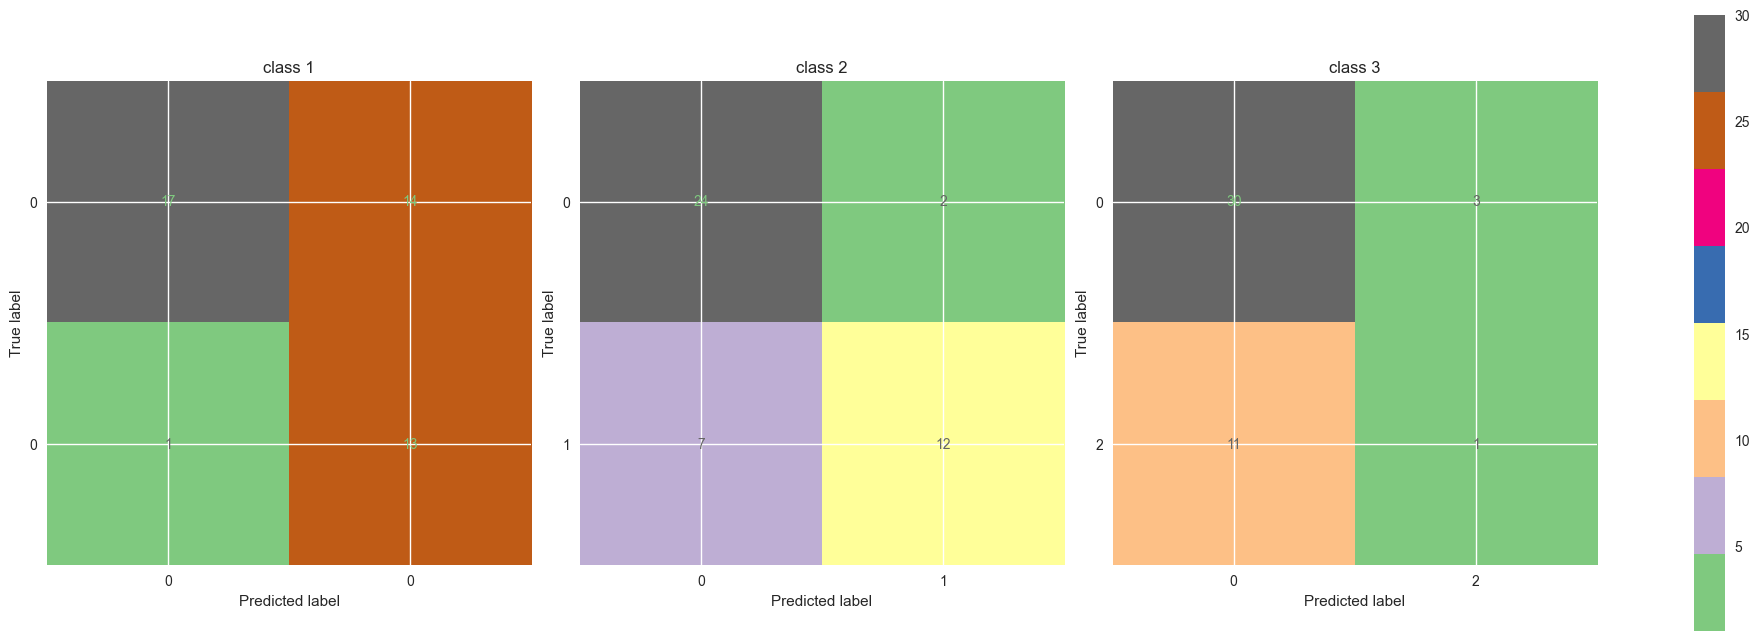

In [13]:
conf_mat = multilabel_confusion_matrix(y_true=y_test, y_pred=pred_dt)

f, axes = plt.subplots(1, 3, figsize=(25, 8))
axes = axes.ravel()
for i in range(3):
    disp = ConfusionMatrixDisplay(conf_mat[i], display_labels=[0, i])
    disp.plot(ax=axes[i], colorbar=None, cmap="Accent")
    disp.ax_.set_title(f'class {i+1}')

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

### SVM

In [18]:
lin = svm.SVC(kernel='linear', degree=3, C=1)
o_vs_r = OneVsRestClassifier(lin).fit(X_train, y_train)
yhat = pd.DataFrame(o_vs_r.predict(X_test))

In [19]:
lin_accuracy = accuracy_score(y_test, yhat)
lin_f1 = f1_score(y_test, yhat, average='macro')
lin_precision = precision_score(y_test, yhat, average='macro')
lin_recall = recall_score(y_test, yhat, average='micro')
print('Accuracy: ', "%.2f" % (lin_accuracy*100))
print('F1: ', "%.2f" % (lin_f1*100))
print('Precision: ', "%.2f" % (lin_precision*100))
print('Recall: ', "%.2f" % (lin_recall*100))

Accuracy:  97.78
F1:  97.95
Precision:  97.78
Recall:  97.78


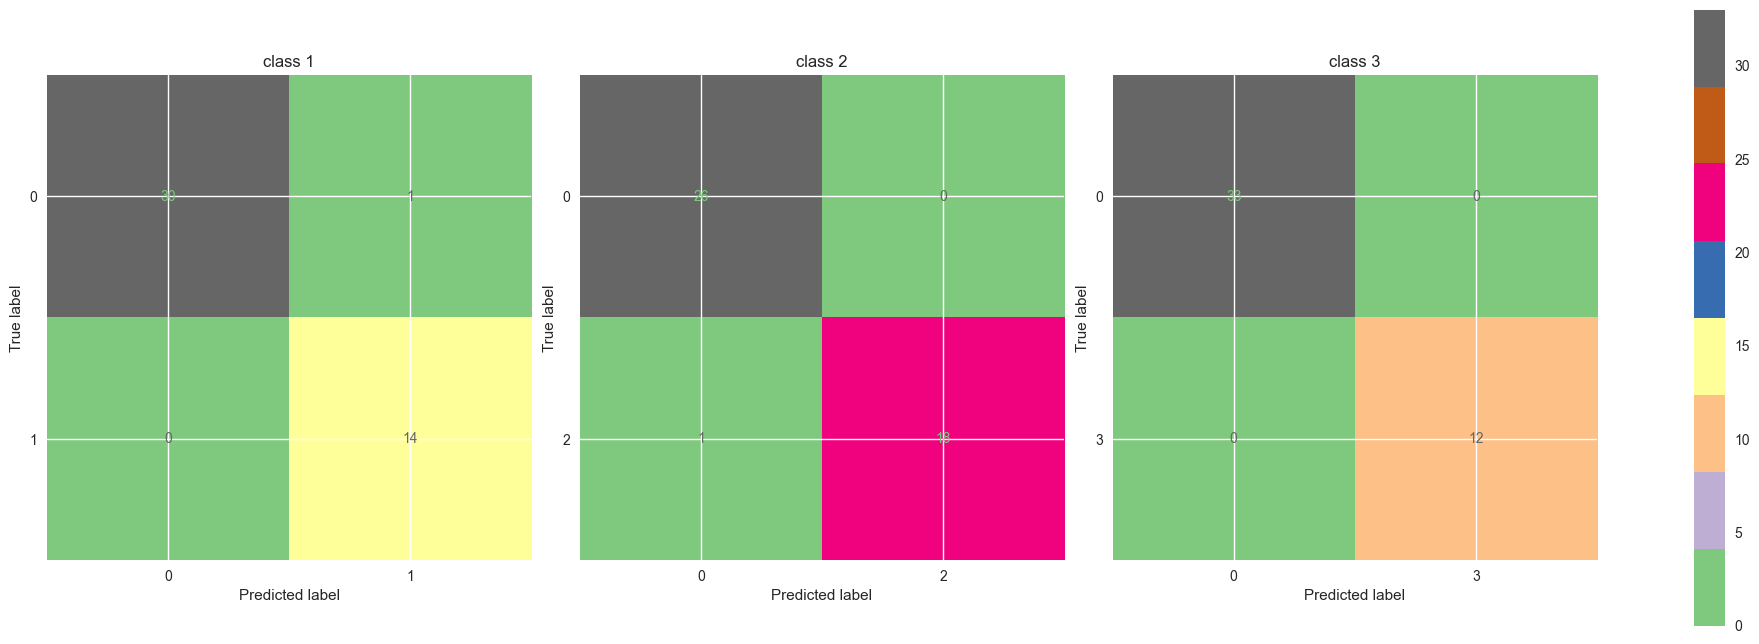

In [16]:
conf_mat = multilabel_confusion_matrix(y_true=y_test, y_pred=yhat)

f, axes = plt.subplots(1, 3, figsize=(25, 8))
axes = axes.ravel()
for i in range(3):
    disp = ConfusionMatrixDisplay(conf_mat[i], display_labels=[0, i+1])
    disp.plot(ax=axes[i], colorbar=None, cmap="Accent")
    disp.ax_.set_title(f'class {i+1}')

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

Roc auc for class 1: 0.9838709677419355
Roc auc for class 2: 0.9736842105263157
Roc auc for class 3: 1.0


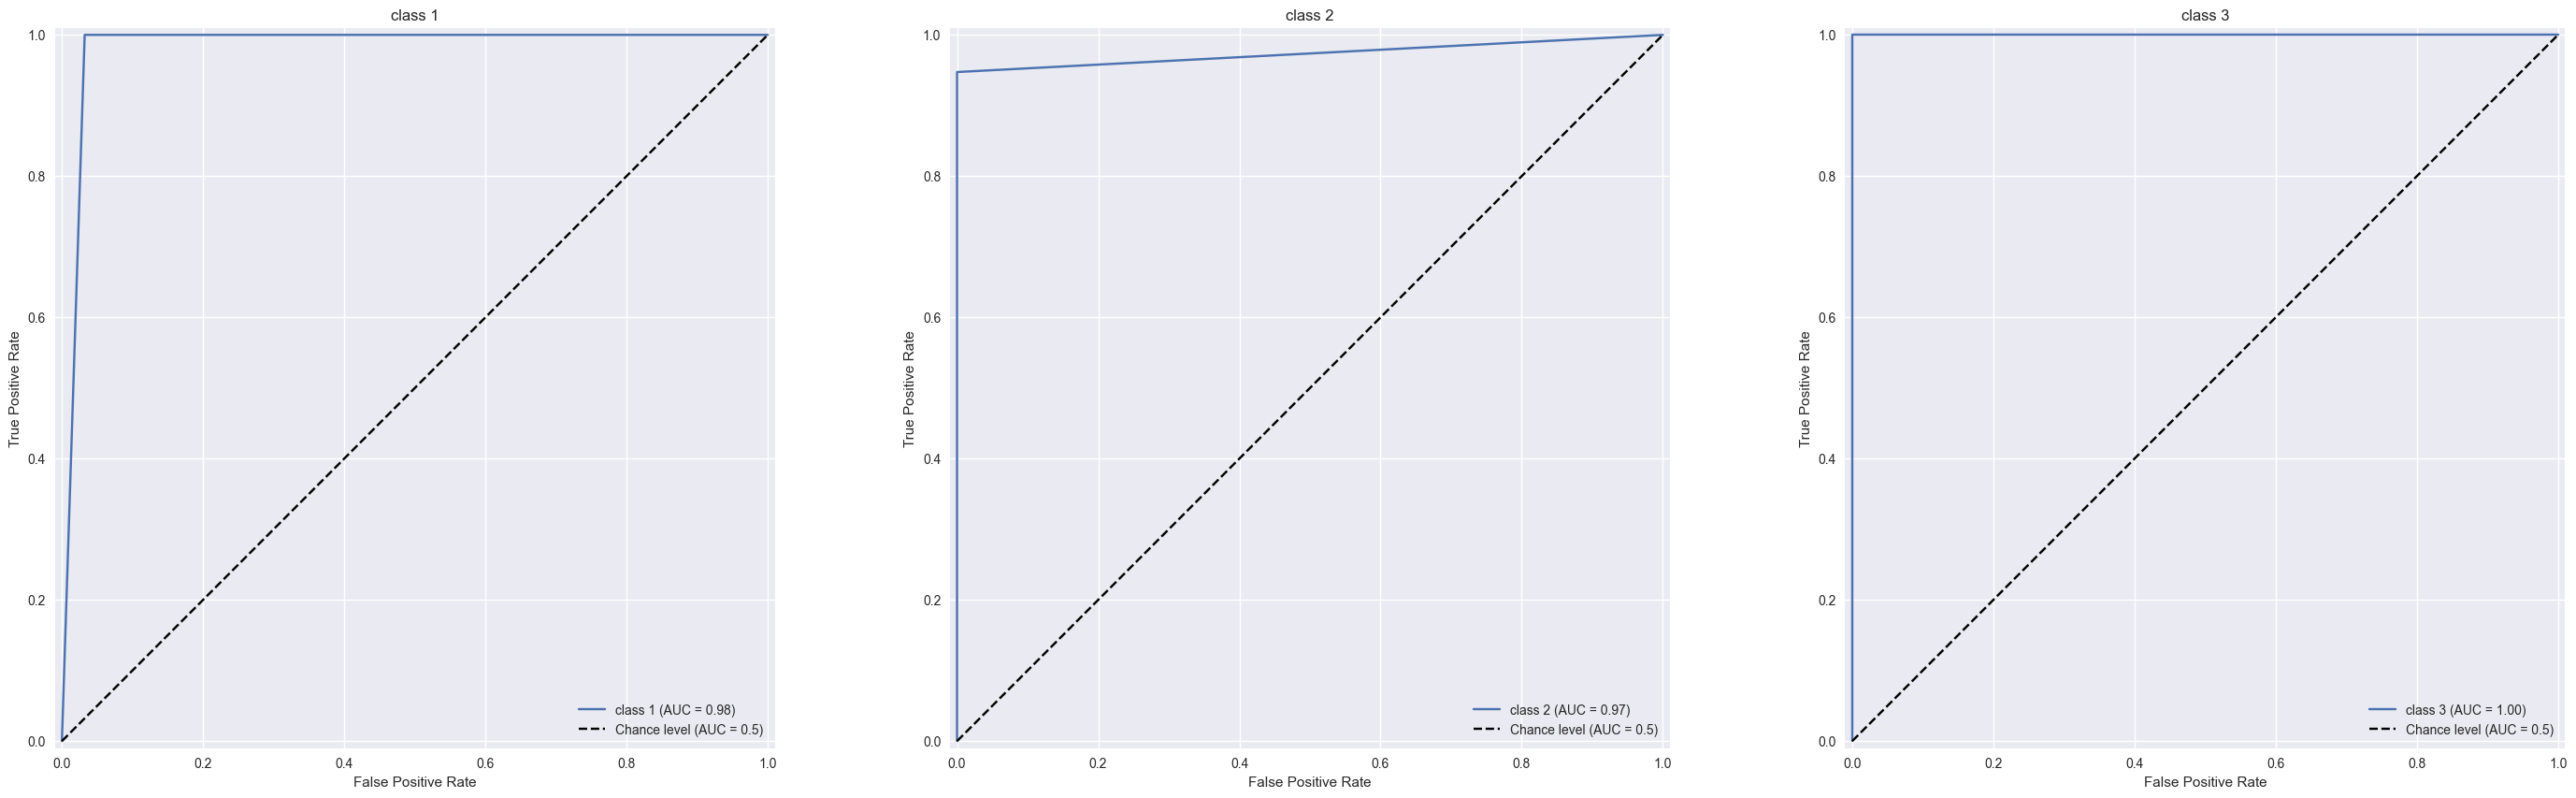

In [17]:
onehotencoder = OneHotEncoder(sparse_output=False)
encoded_y = pd.DataFrame(onehotencoder.fit_transform(y_test[['class']]))
encoded_y.columns = onehotencoder.get_feature_names_out()
y_onehot = encoded_y.join(y_test)
y_onehot.drop('class', axis=1, inplace=True)


encoded_y = pd.DataFrame(onehotencoder.fit_transform(yhat[[0]]))
encoded_y.columns = onehotencoder.get_feature_names_out()
yhat_onehot = encoded_y.join(yhat)
yhat_onehot.drop(0, axis=1, inplace=True)

f, axes = plt.subplots(1, 3, figsize=(35, 10))
axes = axes.ravel()
for i in range(3):
    fp, tp, thresh = roc_curve(y_true=y_onehot[f'class_{i+1}'], y_score=yhat_onehot[f'x0_{i+1}'])
    roc_auc = auc(fp, tp)
    print(f'Roc auc for class {i+1}:', roc_auc)
    
    disp = RocCurveDisplay(fpr=fp, tpr= tp, roc_auc=roc_auc, estimator_name=f'class {i+1}')
    disp.plot(ax=axes[i], plot_chance_level=True)
    
    disp.ax_.set_title(f'class {i+1}')

plt.show()